# Using datasets from the original paper as train data 

- In our study, we used 5 bacterial abundance datasets obtained using the curatedMetagenomicData R package.
- We have concatinated these 5 datasets into a csv file, saved as "data/curatedCRC.csv"
- This data can be used as train data and your input dataset will be used as test data.
- Please refer to data/README.md for more information regarding this dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapmat
import seaborn as sns
import os

In [3]:
# make output dir
if not os.path.exists('output'):
    os.mkdir('output')

## 1. Load curatedCRC.csv

In [4]:
curatedCRC = pd.read_csv('data/curatedCRC.csv',index_col=0)
curatedCRC.head(2)

,Bacteroides_plebeius,Bacteroides_dorei,Faecalibacterium_prausnitzii,Eubacterium_eligens,Bacteroides_ovatus,Parabacteroides_distasonis,Ruminococcus_gnavus,Phascolarctobacterium_faecium,Bacteroides_uniformis,Bifidobacterium_longum,...,Prevotella_bergensis,Treponema_sp_OMZ_838,Selenomonas_sp_FOBRC6,Selenomonas_sp_oral_taxon_138,Pseudomonas_helleri,Barnesiella_viscericola,Coprobacter_sp,study_name,CRC,ajcc_stage
SAMD00114722,0.000131,0.040444,0.006118,0.00954,0.009849,0.044138,0.080406,0.000000,0.032940,0.006659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YachidaS_2019,1,iii
SAMD00114723,0.000002,0.000000,0.007468,0.00000,0.000011,0.009587,0.014821,0.004957,0.000117,0.006459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YachidaS_2019,1,i


In [5]:
curatedCRC_abundance = curatedCRC.drop(['study_name','CRC','ajcc_stage'],axis=1)
curatedCRC_metadata = curatedCRC[['study_name','CRC']]

## 2. Load your own data

In [6]:
input_data = pd.read_csv('data/test.csv',index_col=0)  # ThomasAM_2019_c dataset from curatedMetagenomicData
input_data.head(2)

,Escherichia_coli,Brachyspira_sp_CAG_700,Ruminococcus_gnavus,Eubacterium_siraeum,Parabacteroides_distasonis,Prevotella_sp_CAG_5226,Bacteroides_dorei,Eubacterium_rectale,Odoribacter_splanchnicus,Bacteroides_uniformis,...,Clostridium_sp_D5,Actinomyces_sp_oral_taxon_170,Streptococcus_sp_oral_taxon_056,Streptococcus_sp_HMSC067H01,Cardiobacterium_valvarum,Bacteroides_sp_CAG_598,Prevotella_sp_CAG_1031,Brachyspira_pilosicoli,study_name,CRC
AHCNC2ADXX.N708_CAGAGAGG,11.09962,9.61376,7.85128,4.81324,4.36501,3.95024,3.87566,3.40528,3.32012,3.25638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ThomasAM_2019_c,1
AHCNC2ADXX.N710_CGAGGCTG,4.45030,0.00000,14.17664,0.00000,0.96927,0.00000,23.76831,0.00000,0.54577,1.50179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ThomasAM_2019_c,1


In [7]:
input_data_abundance = input_data.drop(['study_name','CRC'],axis=1)
input_data_metadata = input_data[['study_name','CRC']]

## 3. Concat curatedCRC_abundance and input_data_abundance

- To train an ML model, the train and test data need to have the same number of features
- Since the number of features in the curatedCRC_abundance and input_data_abundance is different, we need to concat the two dataframes

In [8]:
abundance_concat = pd.concat([curatedCRC_abundance,input_data_abundance])
abundance_concat = abundance_concat.replace(np.nan,0.0)

In [9]:
abundance_concat.shape[0] == input_data_abundance.shape[0] + curatedCRC_abundance.shape[0] # check the total number of rows

True

In [10]:
abundance_concat.head(2)

,Bacteroides_plebeius,Bacteroides_dorei,Faecalibacterium_prausnitzii,Eubacterium_eligens,Bacteroides_ovatus,Parabacteroides_distasonis,Ruminococcus_gnavus,Phascolarctobacterium_faecium,Bacteroides_uniformis,Bifidobacterium_longum,...,Lactobacillus_paraplantarum,Lactobacillus_animalis,Serratia_proteamaculans,Prevotella_bergensis,Treponema_sp_OMZ_838,Selenomonas_sp_FOBRC6,Selenomonas_sp_oral_taxon_138,Pseudomonas_helleri,Barnesiella_viscericola,Coprobacter_sp
SAMD00114722,0.000131,0.040444,0.006118,0.00954,0.009849,0.044138,0.080406,0.000000,0.032940,0.006659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAMD00114723,0.000002,0.000000,0.007468,0.00000,0.000011,0.009587,0.014821,0.004957,0.000117,0.006459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Split abundance_concat into train and test data

In [11]:
train_ids = curatedCRC_abundance.index
test_ids = input_data_abundance.index

X_train = abundance_concat.loc[train_ids]
y_train = curatedCRC_metadata['CRC']

X_test = abundance_concat.loc[test_ids]
y_test = input_data_metadata['CRC']

In [12]:
print('Is the number of subjects in X_train matches y_train', X_train.shape[0]==y_train.shape[0])
print('Is the number of subjects in X_test matches y_test', X_test.shape[0]==y_test.shape[0])

print('Number of inital features (bacteria) ', abundance_concat.shape[1]) 

Is the number of subjects in X_train matches y_train True
Is the number of subjects in X_test matches y_test True
Number of inital features (bacteria)  864


## 5. Train a Random Forest Model and find the best abundance thresholds

SHAPMAT provides a module for abundance filtering. There are two parameters to set:
1. __abundance_threshold__: abundance under this threshold will be set to 0. (default: 1e-15)
2. __prevalence_theshold__: features with number of zeros more than this threshold will be removed. (default: 0.9)

In [13]:
from shapmat.abundance_filter import ab_filter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [14]:
thr_1 = [1e-7,1e-8,1e-9,1e-10] # candidates for thr_1
thr_2 = [0.9,0.95] # candidates for thr_2

auc_test_res = {}

for t1 in thr_1:
    for t2 in thr_2:
        X_train_filtered = ab_filter(X_train,abundance_threshold=t1, prevalence_threshold=t2)
        X_test_filtered = X_test[X_train_filtered.columns]
        
        clf = RandomForestClassifier(random_state=0,n_estimators=500)
        clf.fit(X_train_filtered,y_train)
                                 
        y_pred = clf.predict_proba(X_test_filtered)
        y_pred_crc = [pred[1] for pred in y_pred]
        
        # Evaluation on test data
        auc_test = roc_auc_score(y_test, y_pred_crc)
        
        auc_test_res[f'{t1}_{t2}']=round(auc_test,3)

auc_res = pd.DataFrame.from_dict(auc_test_res,orient='index',columns=['auc']).sort_values('auc',ascending=False)

In [15]:
auc_res.head(3) # top 3 best combinations

,auc
1e-07_0.95,0.938
1e-08_0.95,0.938
1e-09_0.95,0.938


According to the result above, the best combination of thresholds is 1e-07 and 0.95.

## 6. Generate SHAP values

In [16]:
from shapmat.explainer import Explainer

In [17]:
X_test_filtered = ab_filter(X_test,abundance_threshold=1e-07, prevalence_threshold=0.95)

model = RandomForestClassifier(random_state=0).fit(X_test_filtered,y_test)

In [18]:
# Get predicted probability
y_pred_proba = model.predict_proba(X_test_filtered)[:, 1] # CRC proba
y_pred_proba = pd.DataFrame(y_pred_proba,index=X_test_filtered.index)

- Below we only obtain the SHAP values of the correctly predicted samples by setting correct_pred_only=True
- We also remove features that have mean(|SHAP|) of zero (features that have no effects to the predictions)

In [19]:
# Calculate SHAP values
RF_explainer = Explainer(X=X_test_filtered,y=y_test,model=model)
shap_values = RF_explainer.shap()
shap_values_df = RF_explainer.shap_df(filter_zero_column=True,
                                      correct_pred_only=True)

Number of features with nonzero mean(|SHAP|): 249/286


## 7. Local Explanation

In [20]:
from shapmat.shap_plot import waterfall_plot

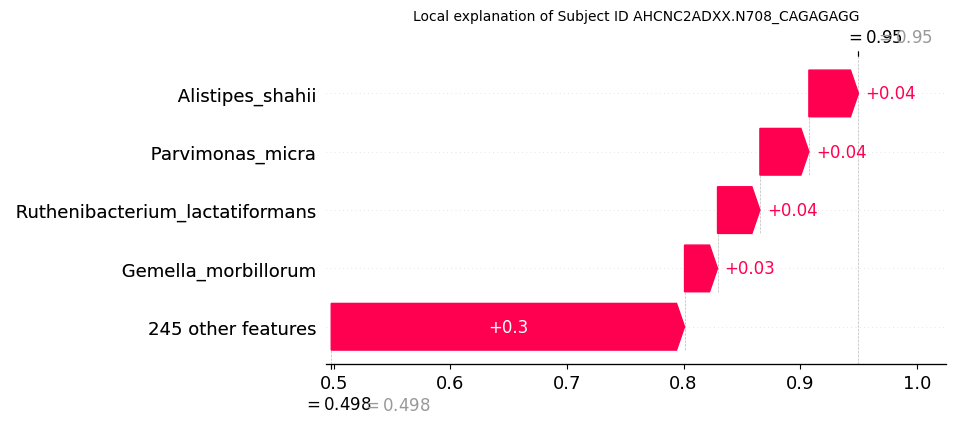

In [21]:
# depending on the input dataframe, the subject_id can be a string or an integer
subject_id = test_ids[0]
explainer_object = RF_explainer.explainer()
waterfall_plot(explainer=explainer_object,
               shap_df=shap_values_df,
               max_display=5, # max number of bacteria displayed
               subject_id=subject_id)

plt.title(f'Local explanation of Subject ID {subject_id}',
          fontsize=10)

plt.show()

## 8. Summary Plot

In [22]:
from shapmat.shap_plot import summary_plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


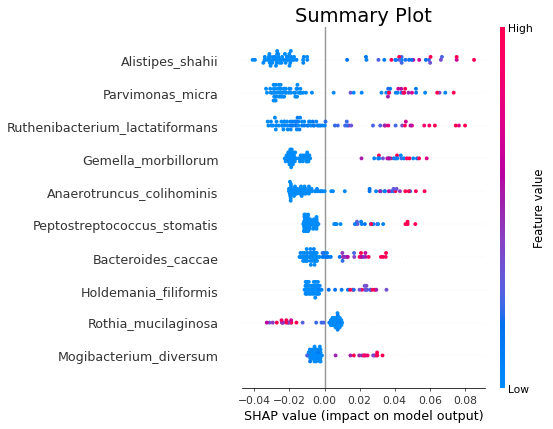

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(8,6),dpi=70)
summary_plot(shap_values=shap_values,
             X=X_test_filtered,
             max_display=10) 
# max_display: number of features to display
    
plt.title('Summary Plot',fontsize=20)
plt.show()

# to save the image
plt.savefig('output/summary_plot.png')

## 9. Perform PCA on SHAP values

In [24]:
from shapmat.PCA import customPCA

In [25]:
n_components=2 # number of PCs
PCA = customPCA(X=shap_values_df,
                crc_proba=y_pred_proba,
                n_components=n_components)

shap_PC = PCA.PCA_scores()

shap_PC.head(2)

,PC1,PC2
AHCNC2ADXX.N708_CAGAGAGG,0.076743,0.006305
AHCNC2ADXX.N710_CGAGGCTG,0.048194,-0.015021


In [26]:
# calculate explained variance
cumulative_explained_var = PCA.cumulative_explained_variance()
cumulative_explained_var

,PC,Explained Variance,Cumulative Variance
0,PC1,0.379192,0.379
1,PC2,0.147454,0.526


### PCA Visualization

In [27]:
from shapmat.PCA_plot import PCAplot

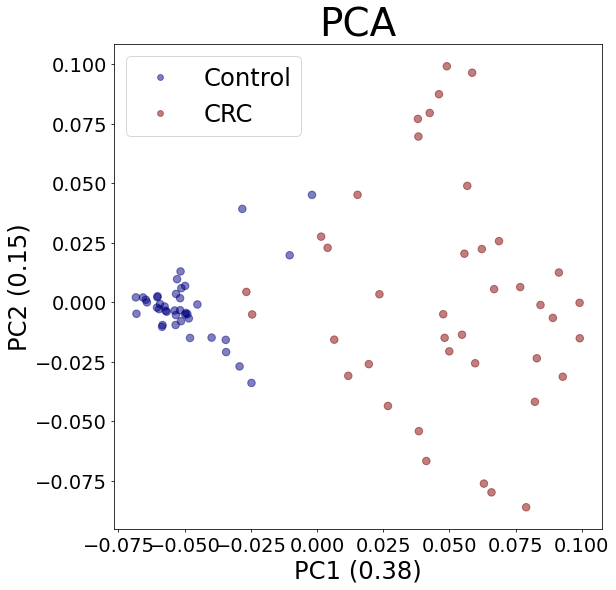

In [28]:
pca_plotter = PCAplot(PC_df=shap_PC,
                      CEV_df=cumulative_explained_var,
                      y=y_test,
                      y_pred_crc_proba=y_pred_proba,
                      correct_pred_only=True)

pca_plotter.plot_pca(figsize=(9,9),
                     dpi=70,
                     disease_label='CRC',
                     savefig=True,
                     output_path='output/pca_plot.png',
                     title='PCA')

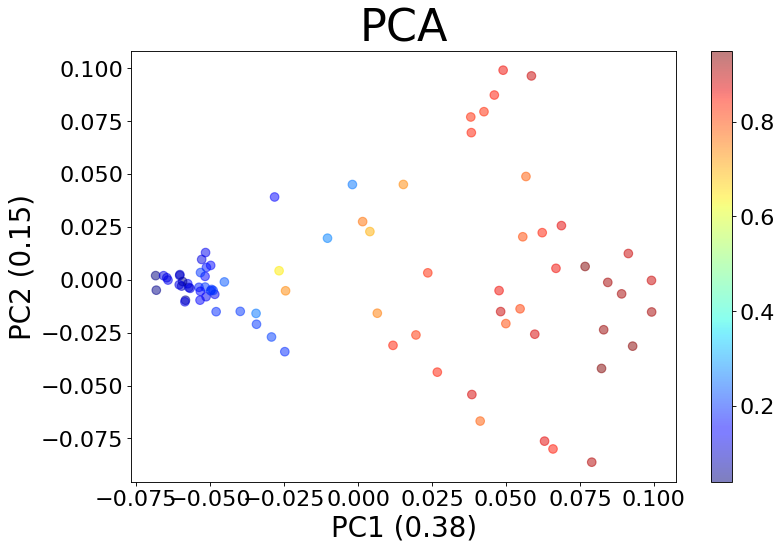

In [29]:
pca_plotter.plot_pca_with_proba(figsize=(7,7),
                                dpi=70,
                                savefig=True,
                                output_path='output/pca_proba.png',
                                title='PCA')

## 10. CRC Clustering using K-means

Next, we cluster the CRC subjects using K-means

In [30]:
from shapmat.clustering import shap_clustering

In [31]:
n_clust = 4
y_correct = y_test.loc[shap_PC.index]  # label of the correctly predicted subjects

CRC_kmeans = shap_clustering(PC_scores=shap_PC,
                             y=y_correct)
CRC_kmeans_df = CRC_kmeans.kmeans(n_clusters=n_clust)

CRC_kmeans_df.head(2)

,PC1,PC2,cluster
AHCNC2ADXX.N708_CAGAGAGG,0.076743,0.006305,1
AHCNC2ADXX.N710_CGAGGCTG,0.048194,-0.015021,1


### Visualize clusters using a scatter plot

In [32]:
from shapmat.clustering_plot import plot_cluster

In [33]:
import matplotlib
matplotlib.__version__

'3.7.1'

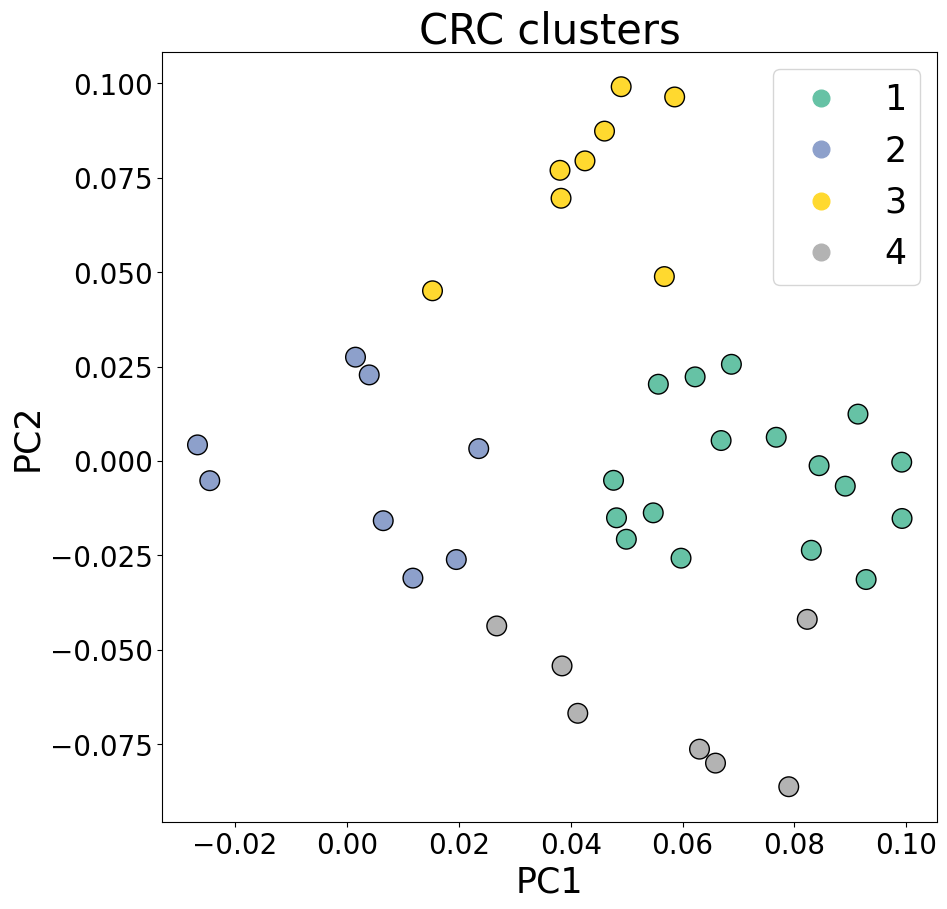

In [34]:
plot_cluster(CRC_cluster_df=CRC_kmeans_df,
             n_cluster=n_clust,
             figsize=(10,10),
             title='CRC clusters',
             savefig=True,
             output_path='output/kmeans.png')

### Elbow method to choose the optimal number of cluster

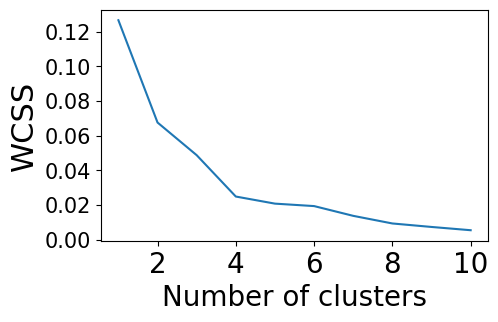

In [35]:
from shapmat.clustering_plot import plot_elbow_method
plot_elbow_method(CRC_cluster_df=CRC_kmeans_df)

## 11. Save Important Dataframes 

In [36]:
# shap values of all correctly predicted subjects 
shap_values_df.to_csv('output/shap.csv')

# predicted cluster labels of CRC subjects
cluster_assigned = CRC_kmeans_df[['cluster']]
cluster_assigned.to_csv('output/CRC_cluster.csv')

## 12. Boxplot for CRC Probability

In [37]:
cluster_assigned.head(2)

,cluster
AHCNC2ADXX.N708_CAGAGAGG,1
AHCNC2ADXX.N710_CGAGGCTG,1


In [38]:
crc_proba_cluster = cluster_assigned.join(y_pred_proba)
crc_proba_cluster.columns = ['cluster','P(CRC)']
crc_proba_cluster.head(2)

,cluster,P(CRC)
AHCNC2ADXX.N708_CAGAGAGG,1,0.95
AHCNC2ADXX.N710_CGAGGCTG,1,0.89


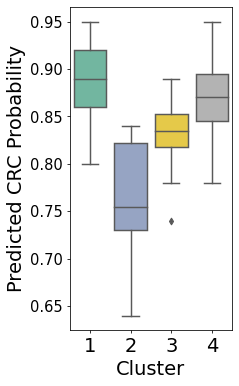

In [39]:
fig = plt.figure(figsize=(3,6),dpi=70)

my_pallete = {1:"#66c2a4", 2:"#8ea1ca", 3:"#ffd92f",4:'#b3b3b3'}
sns.boxplot(x='cluster',y='P(CRC)', data= crc_proba_cluster, palette=my_pallete)
plt.ylabel('Predicted CRC Probability',fontsize=20)
plt.xlabel('Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.savefig('output/crc_proba_boxplot.png',bbox_inches='tight')
plt.show()

## 13. Feature Importance for each cluster

In [40]:
import shap

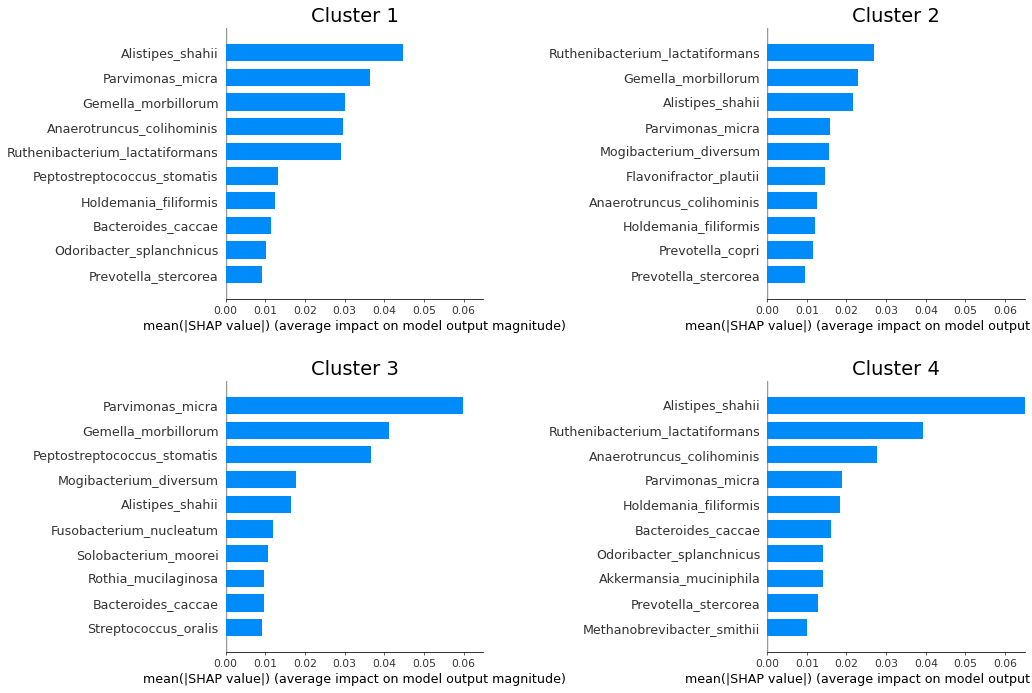

In [41]:
n_clust=4
nrows, ncols= 2, 2
fig = plt.figure(figsize=(15,10),dpi=70)

for i in range(1,n_clust+1):
    ax = fig.add_subplot(nrows, ncols, i)
    cluster_name=i
    c_ids = cluster_assigned[cluster_assigned['cluster']==cluster_name].index.to_list()

    shap_values_df_c = shap_values_df.loc[c_ids]
    shap_values_c = shap_values_df_c.values # matrix
    X_c = X_test_filtered[shap_values_df_c.columns].loc[c_ids]
    
    shap.summary_plot(shap_values_c,X_c,show=False,plot_size=None, max_display=10,plot_type='bar')
    
    plt.xlim((0,0.065))
    plt.title(f'Cluster {cluster_name}',fontsize=20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.1, hspace=0.3)
plt.savefig('output/cluster_feature_importance.png',bbox_inches='tight')